# Practica3
## Eduardo Leonel Sanchez Velasco
## NC: 420002035

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from random import randint as rand
from skimage import io, util
from math import ceil, floor
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [23]:
def plot_img(img,title):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.title(title+' '+name)
    plt.imshow(image)
    plt.show()

In [24]:
def salt_pepper_noise(img):
    img2 = img.copy() 
    y_space, x_space = img.shape
    pepper = 0.015
    salt = 1 - pepper
    for y in range(y_space):
        for x in range(x_space):
            rdn = np.random.random()
            if rdn < pepper:
                img2[y][x] = 0
            elif rdn > salt:
                img2[y][x] = 1
    return img2

In [25]:
def filter(f,d_0,n=5):
    M,N = f.shape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            
            d = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u][v] = 1/(1.0 + (d/d_0)**(2*n))
            
    return H
                

In [26]:
def saveImg(diccionario, tipo):
    for img in diccionario.keys():
        plt.imsave('resultados2/{}_{}.jpg'.format(tipo,img),diccionario[img])

In [27]:
imagenes = {}
tf_imagenes = {}
ctf_imagenes = {}
magnitud_ctf_pb = {}
fase_ctf = {}
amplitud_ctf_pb = {}
inverse_amplitud_ctf_pb = {}
inverse_fase_ctf = {}
magnitud_tf = {}
fase_tf = {}
amplitud_tf = {}
inverse_amplitud_tf = {}
inverse_fase_tf = {}
inverse_tf_img = {}
inverse_ctf_img = {}

In [28]:
imagenes_ruido = {}
tf_imagenes_ruido = {}
ctf_imagenes_ruido = {}
magnitud_ctf_pb_ruido = {}
fase_ctf_ruido = {}
amplitud_ctf_pb_ruido = {}
inverse_amplitud_ctf_pb_ruido = {}
inverse_fase_ctf_ruido = {}
magnitud_tf_ruido = {}
fase_tf_ruido = {}
amplitud_tf_ruido = {}
inverse_amplitud_tf_ruido = {}
inverse_fase_tf_ruido = {}
inverse_tf_img_ruido = {}
inverse_ctf_img_ruido = {}

In [29]:
rm=io.imread('imagenes/fourier_bw512.bmp')/255
imagenes['fourier_bw'] = rm
rm=io.imread('imagenes/ImagenEspectroF.png')/255
imagenes['Espectro_Fourier'] = rm
rm=io.imread('imagenes/saturn_bw.tif')/255
imagenes['Saturn_bw'] = rm

In [30]:
for img in imagenes:
    imagenes_ruido[img] = salt_pepper_noise(imagenes[img])

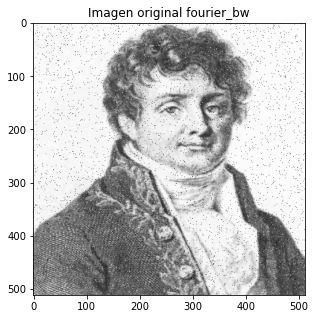

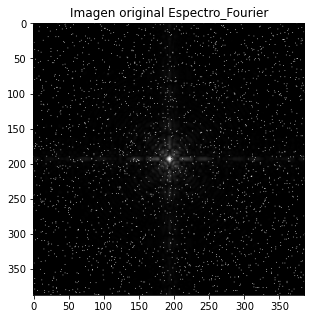

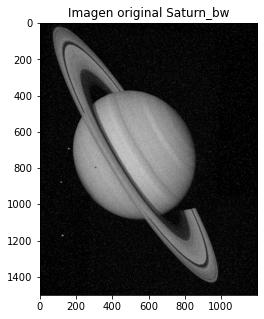

In [31]:
for img in imagenes:
    plot_img((img,imagenes_ruido[img]),'Imagen original')

In [32]:
for img in imagenes:
    tf_imagenes[img] = np.fft.fft2(imagenes[img])
    tf_imagenes_ruido[img] = np.fft.fft2(imagenes_ruido[img])
    

In [33]:
for img in imagenes:
    ctf_imagenes[img] =  np.fft.fftshift(tf_imagenes[img])
    ctf_imagenes_ruido[img] =  np.fft.fftshift(tf_imagenes_ruido[img])

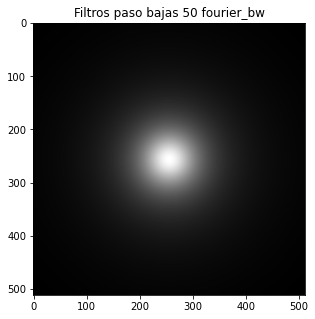

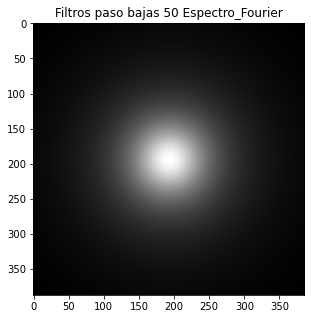

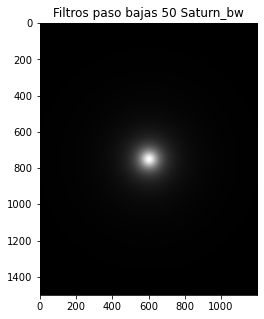

In [34]:
filtros_BPB = {}
for img in imagenes:
    filtros_BPB[img] = filter(ctf_imagenes[img],50,1)
for img in imagenes:
    plot_img((img,filtros_BPB[img]),'Filtros paso bajas 50')

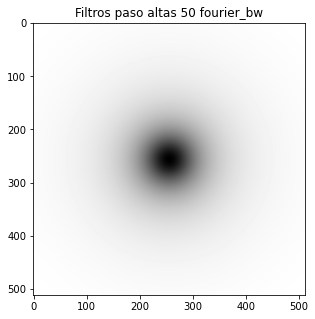

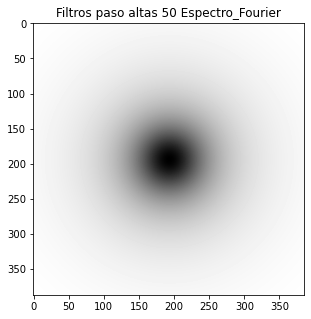

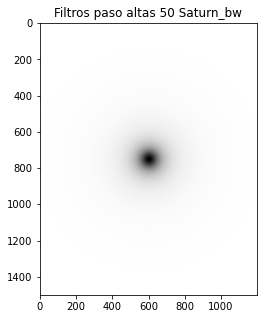

In [35]:
filtros_BPA = {}
for img in imagenes:
    filtros_BPA[img] = 1 - filtros_BPB[img]
for img in imagenes:
    plot_img((img,filtros_BPA[img]),'Filtros paso altas 50')

In [36]:
## Filtrado Paso Bajas
filtrado_paso_bajas = {}
filtrado_paso_bajas_ruido = {}

for img in imagenes:
    filtrado_paso_bajas[img] = ctf_imagenes[img] * filtros_BPB[img]
    filtrado_paso_bajas_ruido[img] = ctf_imagenes_ruido[img] * filtros_BPB[img]
    

In [37]:
## Filtrado Paso altas
filtrado_paso_altas = {}
filtrado_paso_altas_ruido = {}

for img in imagenes:
    filtrado_paso_altas[img] = ctf_imagenes[img] * filtros_BPA[img]
    filtrado_paso_altas_ruido[img] = ctf_imagenes_ruido[img] * filtros_BPA[img]

In [38]:
## Mostramos como se ve el espectro
magnitud_ctf_pb_ruido = {}
for img in imagenes:
    magnitud_ctf_pb[img] = abs(filtrado_paso_bajas[img])
    magnitud_ctf_pb_ruido[img] = abs(filtrado_paso_bajas_ruido[img])
    
amplitud_ctf_pb_ruido = {}
for img in imagenes:
    amplitud_ctf_pb[img] = np.log1p(magnitud_ctf_pb[img]) 
    amplitud_ctf_pb_ruido[img] = np.log1p(magnitud_ctf_pb_ruido[img]) 
    

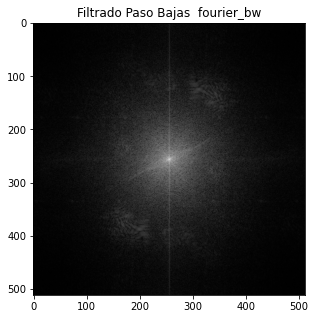

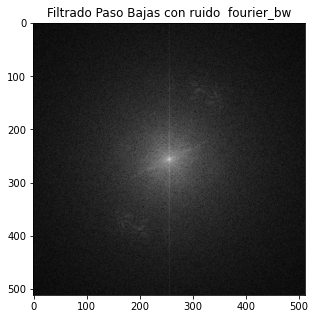

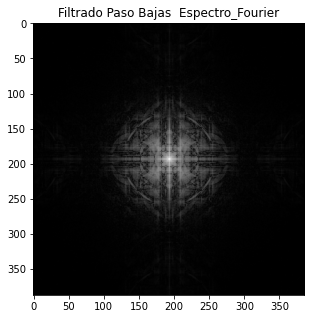

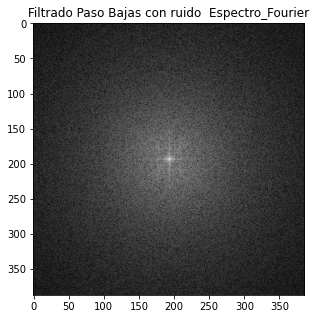

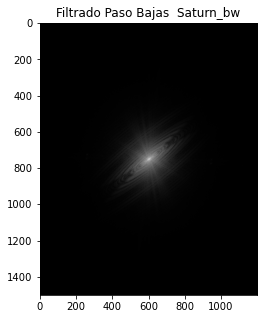

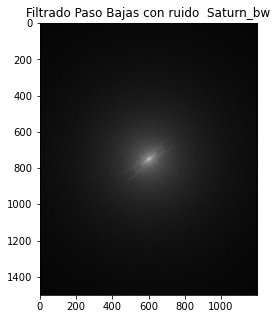

In [39]:
for img in imagenes:
    plot_img((img,amplitud_ctf_pb[img]),'Filtrado Paso Bajas ')
    plot_img((img,amplitud_ctf_pb_ruido[img]),'Filtrado Paso Bajas con ruido ')
    

In [40]:
magnitud_ctf_pa_ruido = {}
magnitud_ctf_pa = {}

for img in imagenes:
    magnitud_ctf_pa[img] = abs(filtrado_paso_altas[img])
    magnitud_ctf_pa_ruido[img] = abs(filtrado_paso_altas_ruido[img])
    
amplitud_ctf_pa_ruido = {}
amplitud_ctf_pa = {}

for img in imagenes:
    amplitud_ctf_pa[img] = np.log1p(magnitud_ctf_pa[img]) 
    amplitud_ctf_pa_ruido[img] = np.log1p(magnitud_ctf_pa_ruido[img]) 

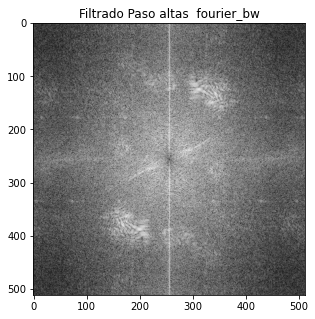

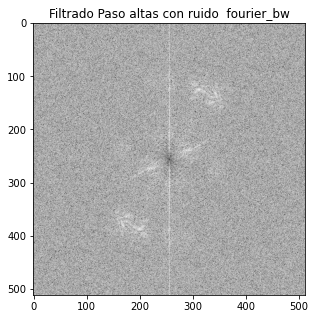

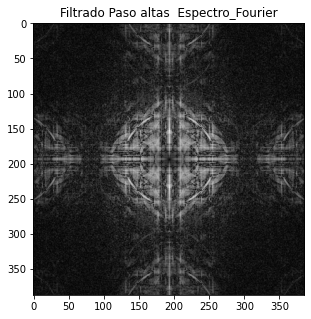

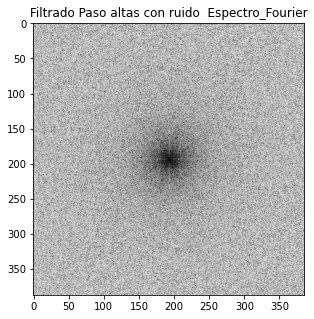

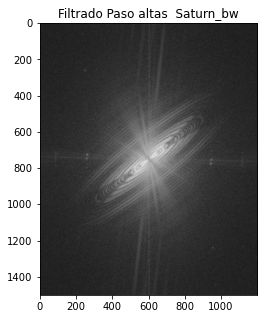

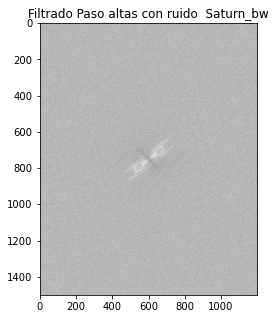

In [41]:
for img in imagenes:
    plot_img((img,amplitud_ctf_pa[img]),'Filtrado Paso altas ')
    plot_img((img,amplitud_ctf_pa_ruido[img]),'Filtrado Paso altas con ruido ')

In [42]:
saveImg(filtros_BPA,'Filtro_PasAlt')
saveImg(filtros_BPB,'Filtro_PasBaj')
saveImg(amplitud_ctf_pb,'Filtro_en_img_bajas')
saveImg(amplitud_ctf_pa,'Filtro_en_img_altas')
saveImg(amplitud_ctf_pb_ruido,'Filtro_en_img_bajas_ruid')
saveImg(amplitud_ctf_pa_ruido,'Filtro_en_img_altas_ruid')

In [43]:
inverse_ctf_img_PA = {}
inverse_ctf_img_PA_ruido = {}

for img in imagenes:
    inverse_ctf_img[img] = np.fft.ifftshift(filtrado_paso_bajas[img])
    inverse_ctf_img_PA[img] = np.fft.ifftshift(filtrado_paso_altas[img])
    inverse_ctf_img_ruido[img] = np.fft.ifftshift(filtrado_paso_bajas_ruido[img])
    inverse_ctf_img_PA_ruido[img] = np.fft.ifftshift(filtrado_paso_altas_ruido[img])
    
    

In [44]:
inverse_amplitud_ctf_pa = {}
inverse_amplitud_ctf_pa_ruido = {}


for img in imagenes:
    inverse_amplitud_ctf_pb[img] = np.log1p(np.abs(inverse_ctf_img[img]))
    inverse_amplitud_ctf_pb_ruido[img] = np.log1p(np.abs(inverse_ctf_img_ruido[img]))
    inverse_amplitud_ctf_pa[img] = np.log1p(np.abs(inverse_ctf_img_PA[img]))
    inverse_amplitud_ctf_pa_ruido[img] = np.log1p(np.abs(inverse_ctf_img_PA_ruido[img]))
    
    
    

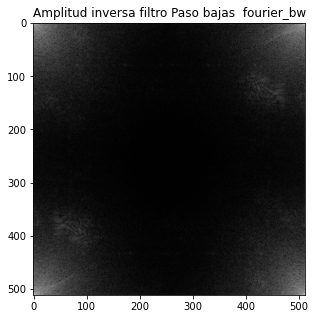

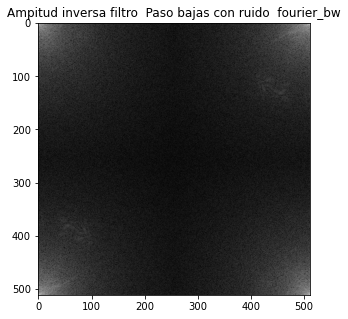

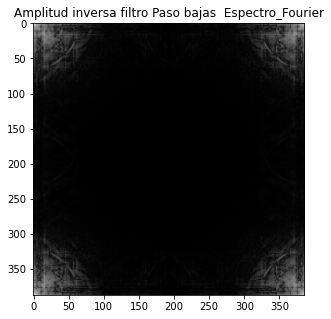

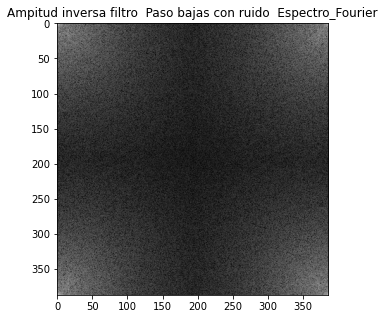

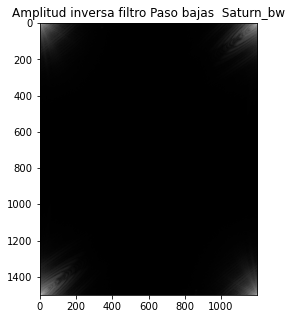

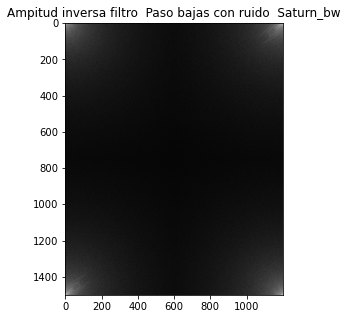

In [45]:
for img in imagenes:
    plot_img((img,inverse_amplitud_ctf_pb[img]),'Amplitud inversa filtro Paso bajas ')
    plot_img((img,inverse_amplitud_ctf_pb_ruido[img]), 'Ampitud inversa filtro  Paso bajas con ruido ')

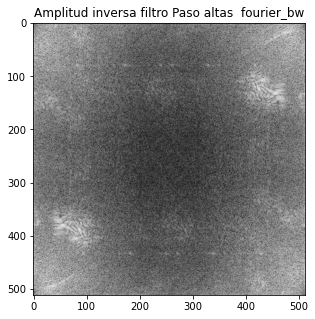

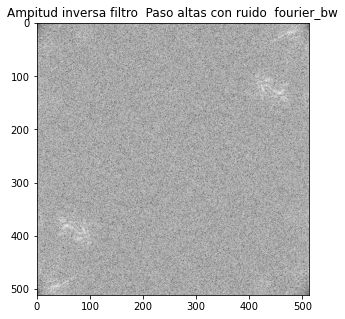

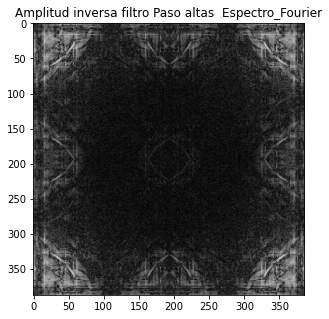

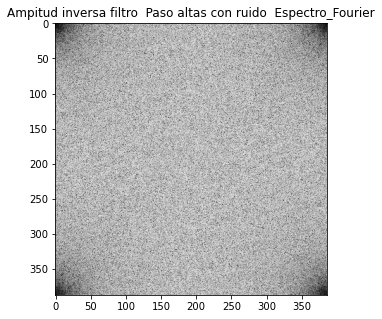

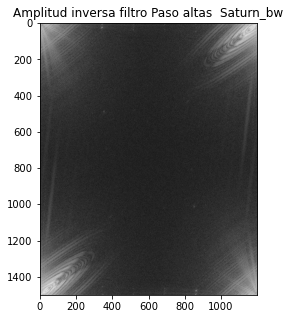

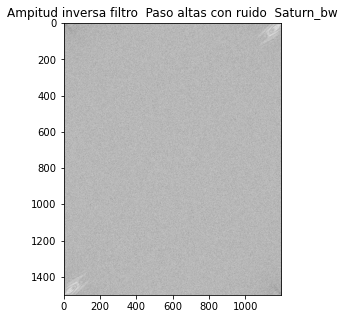

In [46]:
for img in imagenes:
    plot_img((img,inverse_amplitud_ctf_pa[img]),'Amplitud inversa filtro Paso altas ')
    plot_img((img,inverse_amplitud_ctf_pa_ruido[img]), 'Ampitud inversa filtro  Paso altas con ruido ')

In [47]:
regreso_imagen_pb = {}
regreso_imagen_pb_ruido = {}
regreso_imagen_pa = {}
regreso_imagen_pa_ruido = {}

In [48]:
for img in imagenes:
    regreso_imagen_pb[img] = np.abs(np.fft.ifft2(inverse_ctf_img[img]))
    regreso_imagen_pb_ruido[img] = np.abs(np.fft.ifft2(inverse_ctf_img_ruido[img]))
    regreso_imagen_pa[img] = np.abs(np.fft.ifft2(inverse_ctf_img_PA[img]))
    regreso_imagen_pa_ruido[img] = np.abs(np.fft.ifft2(inverse_ctf_img_PA_ruido[img]))    

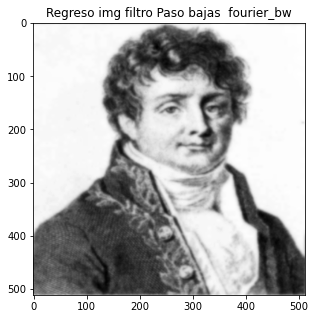

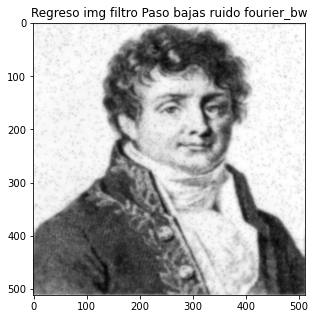

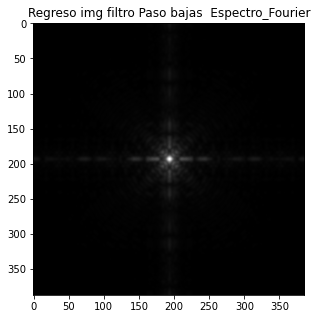

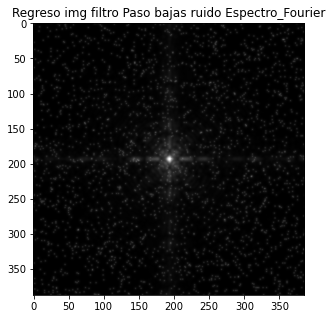

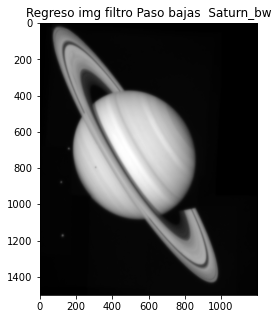

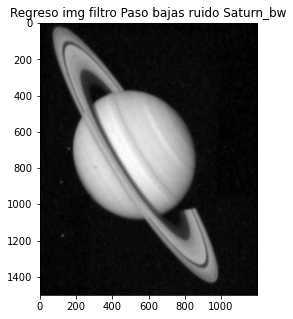

In [49]:
for img in imagenes:
    plot_img((img,regreso_imagen_pb[img]),'Regreso img filtro Paso bajas ')
    plot_img((img,regreso_imagen_pb_ruido[img]), 'Regreso img filtro Paso bajas ruido')

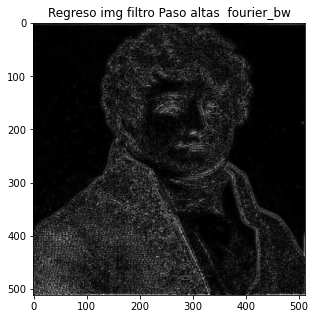

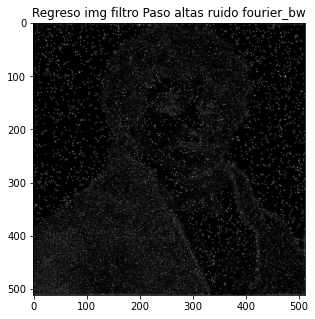

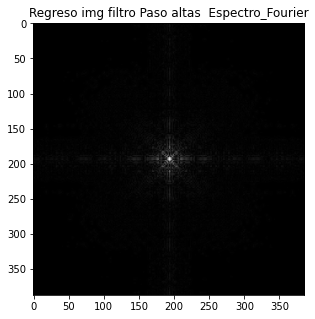

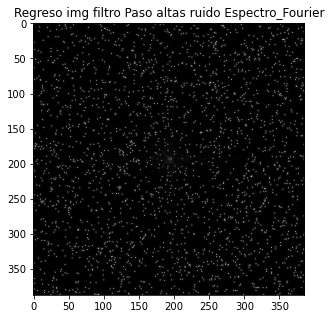

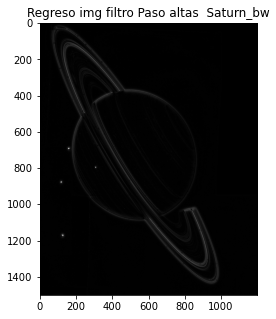

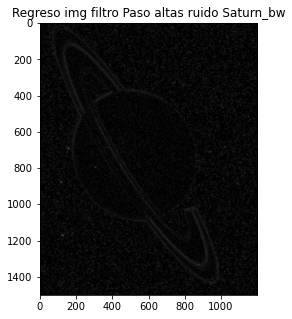

In [50]:
for img in imagenes:
    plot_img((img,regreso_imagen_pa[img]),'Regreso img filtro Paso altas ')
    plot_img((img,regreso_imagen_pa_ruido[img]), 'Regreso img filtro Paso altas ruido')

In [51]:
saveImg(regreso_imagen_pb,'ImagenConFiltroPasBaj')
saveImg(regreso_imagen_pa,'ImagenConFiltroPasAlt')
saveImg(regreso_imagen_pb_ruido,'ImagenConFiltroPasBajRuido')
saveImg(regreso_imagen_pa_ruido,'ImagenConFiltroPasAltRuido')